In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Aboutsklearn.preprocessingt 

In [2]:
# Dataset obtained from uci accomponied with research paper
# Do visualizations and add points from paper wherever possible

# About Dataset


### Context
Dataset of Starcraft 2 games, played in different leagues/levels.

### Content
Screen movements aggregated into screen-fixations.

-- Time is recorded in terms of timestamps in the StarCraft 2 replay file. When the game is played on 'faster', 1 real-time second is equivalent to roughly 88.5 timestamps.

Attribute Information:

1. GameID: Unique ID number for each game (integer)
2. LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)
3. Age: Age of each player (integer)
4. HoursPerWeek: Reported hours spent playing per week (integer)
5. TotalHours: Reported total hours spent playing (integer)
6. APM: Action per minute (continuous)
7. SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)
8. AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp (continuous)
9. UniqueHotkeys: Number of unique hotkeys used per timestamp (continuous)
10. MinimapAttacks: Number of attack actions on minimap per timestamp (continuous)
11. MinimapRightClicks: number of right-clicks on minimap per timestamp (continuous)
12. NumberOfPACs: Number of PACs per timestamp (continuous)
13. GapBetweenPACs: Mean duration in milliseconds between PACs (continuous)
14. ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)
15. ActionsInPAC: Mean number of actions within each PAC (continuous)
16. TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)
17. WorkersMade: Number of SCVs, drones, and probes trained per timestamp (continuous)
18. UniqueUnitsMade: Unique unites made per timestamp (continuous)
19. ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp (continuous)
20. ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp (continuous)


### Acknowledgements
Source:

1. Thompson JJ, Blair MR, Chen L, Henrey AJ (2013) Video Game Telemetry as a Critical Tool in the Study of Complex Skill Learning. PLoS ONE 8(9): e75129. [Web Link]

-- Results:

-- Skip league conditional inference forest classification (Bronze-Gold;Silver-Platinum;Gold-Diamond;Platinum-Masters;Diamond-Professional) showed changing patterns of variable importance with skill.
http://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset

Paper: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0075129

In [44]:
df_raw = pd.read_csv('SkillCraft.csv')
df = df_raw.copy()

In [45]:
print(df.shape)
# df.info()

(3338, 20)


In [46]:
print(df.isna().sum().sum())
# print(df.nunique())

0


#### Classification task:

#### Target: LeagueIndex

In [47]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [48]:
df.drop('GameID', axis = 1, inplace = True)

In [49]:
y = df['LeagueIndex']
X = df.drop('LeagueIndex', axis = 1)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

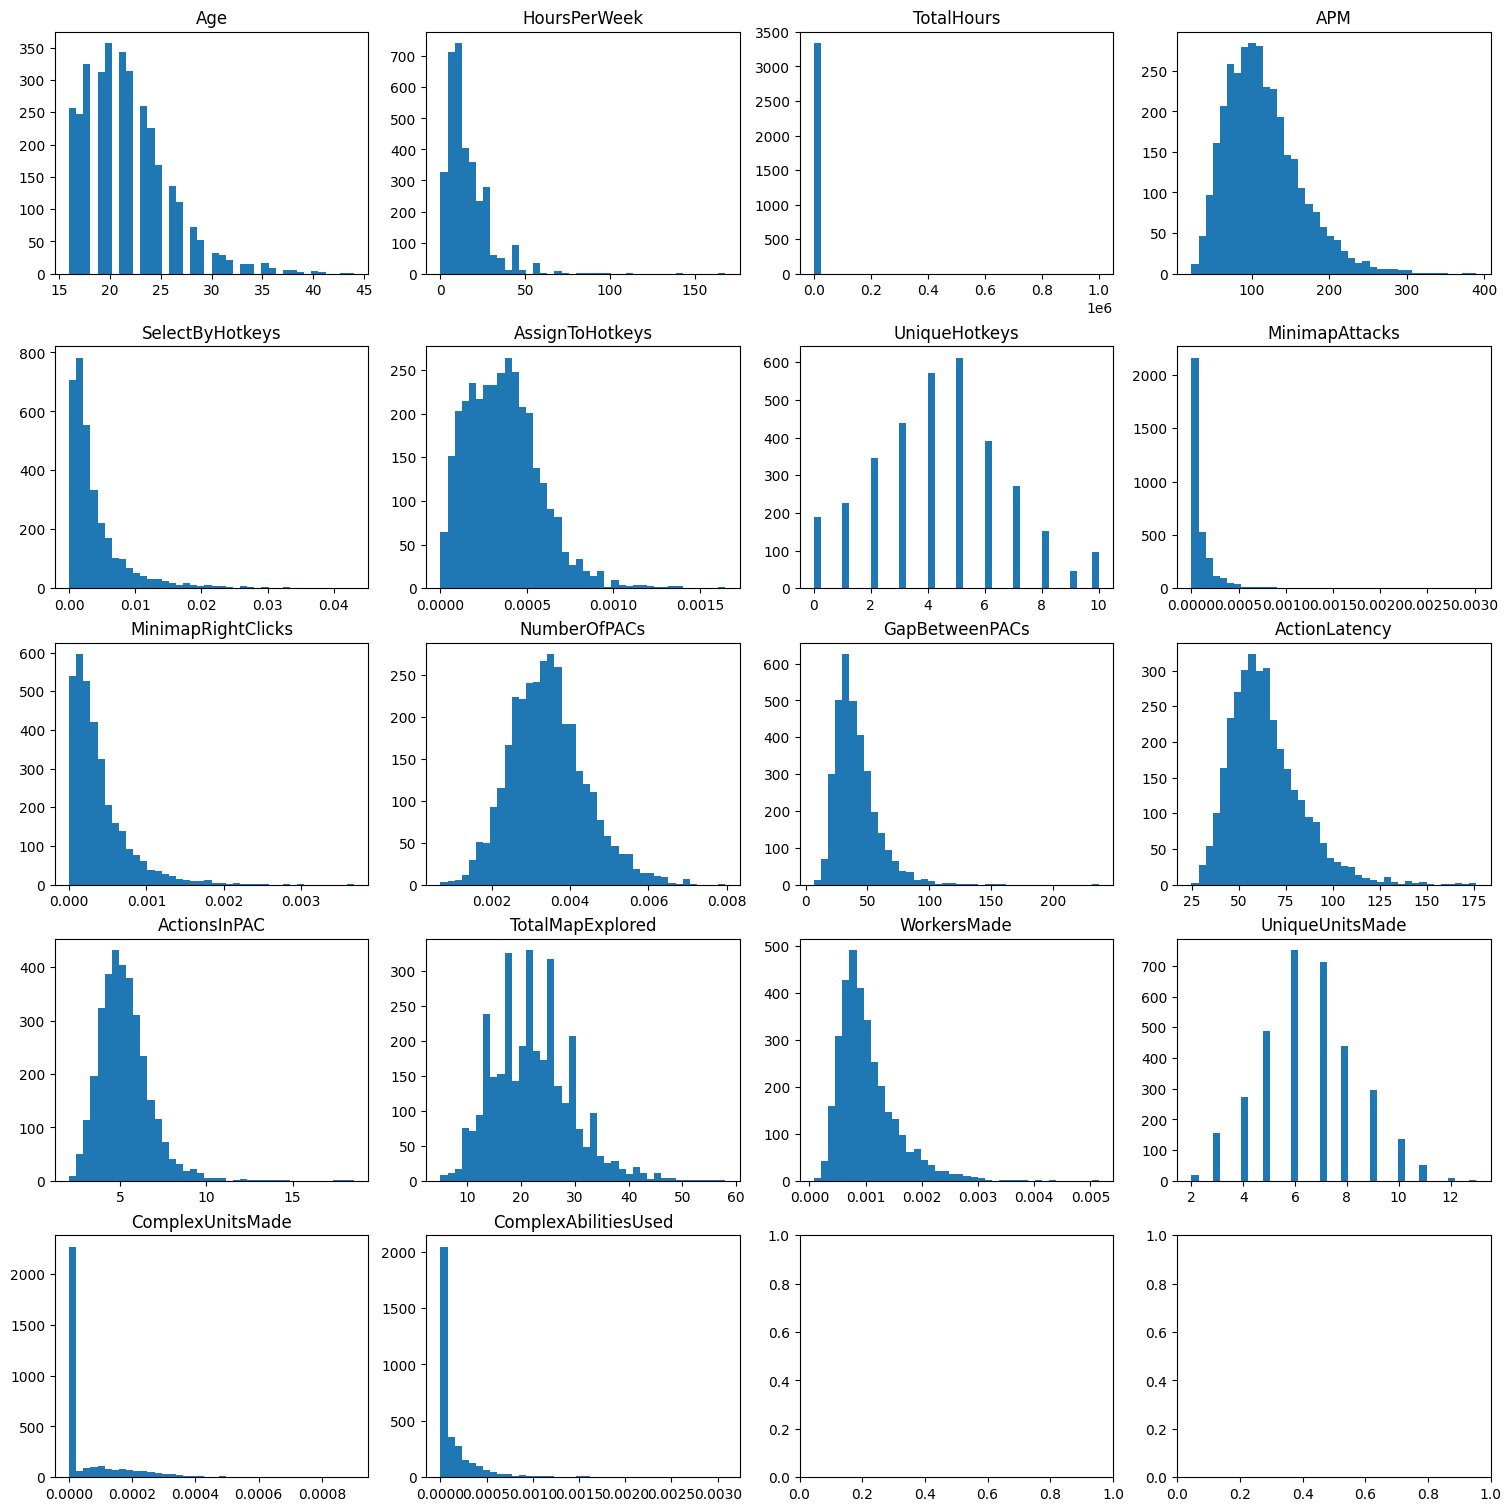

In [63]:
def plot_data_distribution():
    fig, ax = plt.subplots(5, 4, figsize = (15, 15), layout = 'constrained')
    for idx, col in enumerate(X.columns):
        ax.flat[idx].hist(X[col], bins = 40)
        ax.flat[idx].title.set_text(col)

plot_data_distribution()

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [52]:
# df.LeagueIndex = df.LeagueIndex.map({1:'Bronze', 2:'Silver', 3:'Gold', 4:'Platinum', 5:'Diamond', 6:'Master', 7:'GrandMaster'})

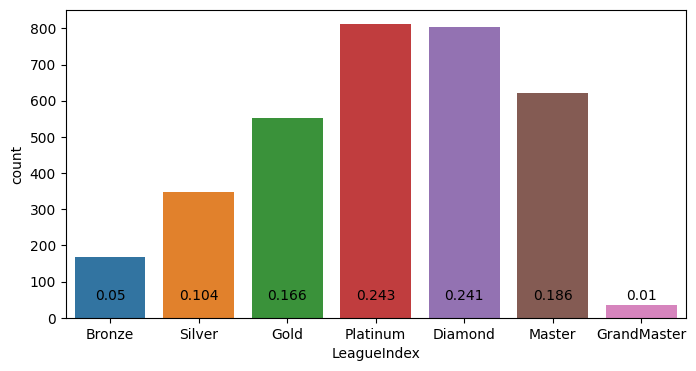

In [53]:
def plot_rank_distribution():
    plt.figure(figsize = (8,4))
    sns.countplot(x = df.LeagueIndex)
    p = np.round(df.LeagueIndex.value_counts(normalize=True).sort_index().to_numpy(), 3)
    for i in range(len(p)):
        plt.text(x = i, y = 50, s = p[i], ha = 'center')
    plt.xticks(ticks = range(0,7), labels = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster']);

plot_rank_distribution()

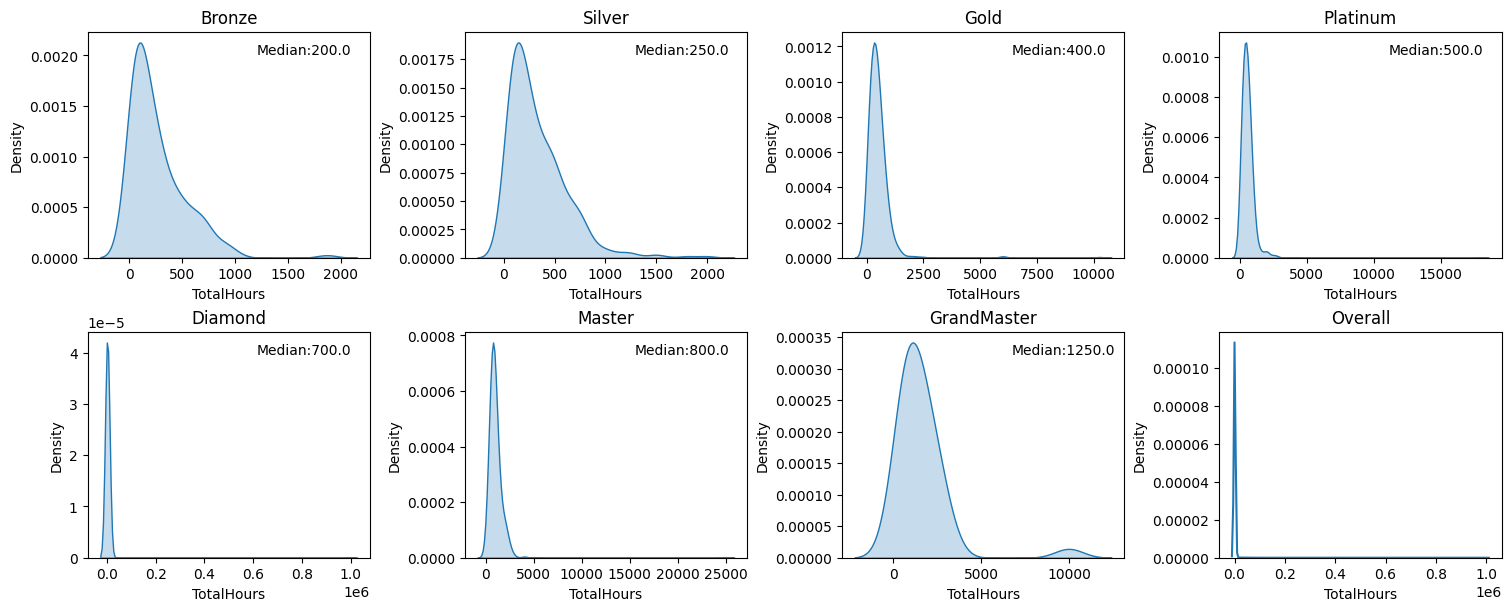

In [54]:
def plot_totalhours():
    labels = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster']
    fig, ax = plt.subplots(2, 4, figsize = (15, 6), layout = 'constrained')
    for i in range(7):
        data = df.loc[df.LeagueIndex == i+1]['TotalHours']
        median = data.median()
        sns.kdeplot(data, fill = True, ax = ax.flat[i])
        ax.flat[i].title.set_text(labels[i])
        ax.flat[i].text(x = 0.6, y = 0.9, s = f"Median:{median}", transform=ax.flat[i].transAxes)
    sns.kdeplot(df.TotalHours, ax = ax.flat[7])
    ax.flat[7].title.set_text('Overall')
    plt.show();

plot_totalhours()

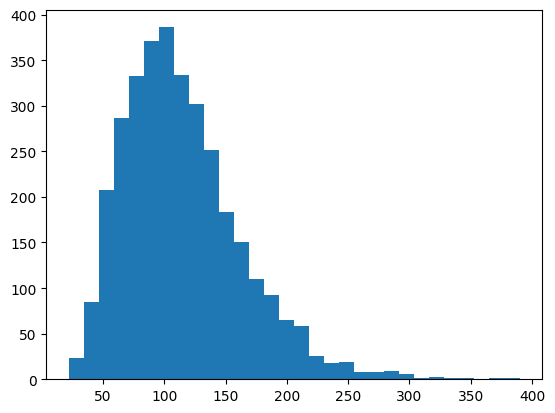

In [65]:
plt.hist(df.APM, bins = 30);

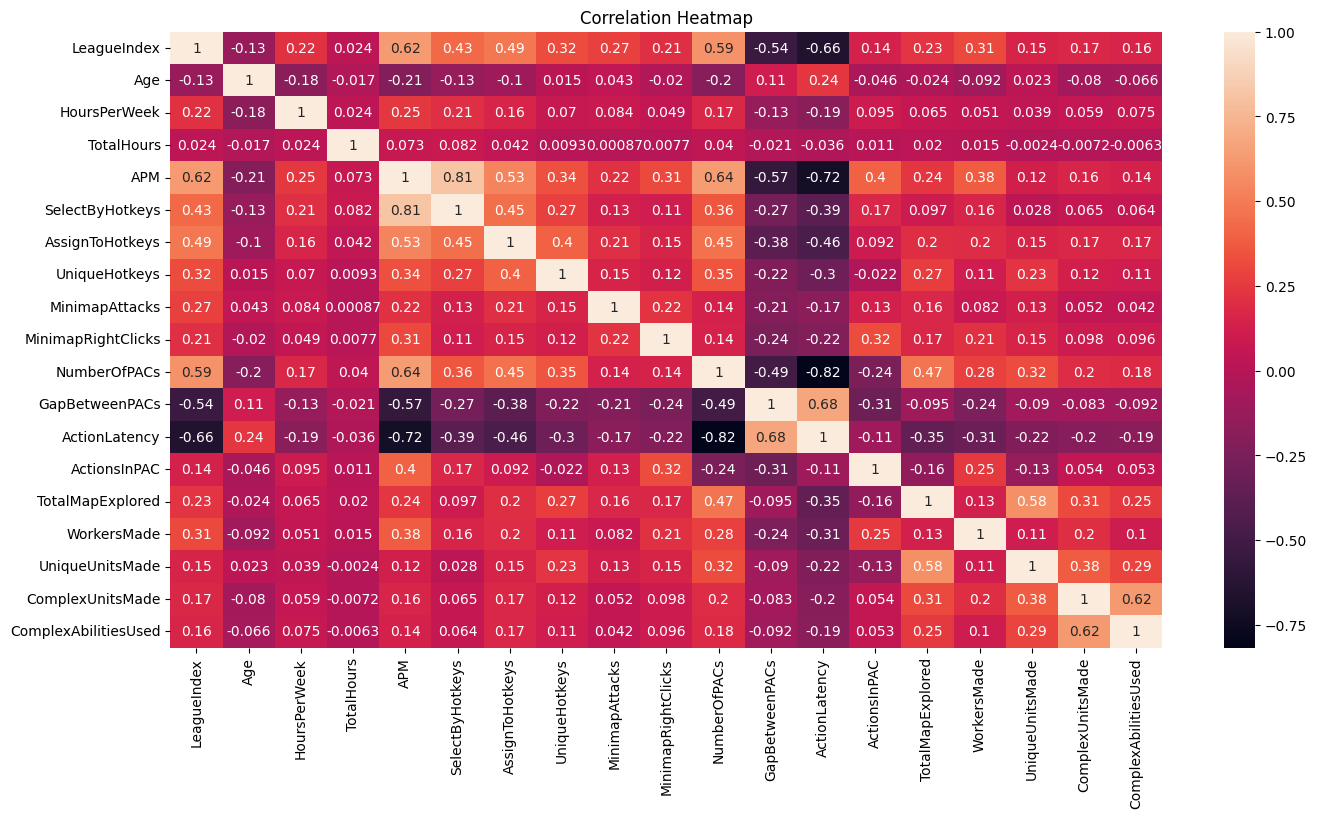

In [64]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True).set(title='Correlation Heatmap')
plt.show()